##**Programação e Algoritmos I**

Prof Alexandre Levada

###**A recorrência logística**

Um modelo matemático simples, porém capaz de gerar comportamentos caóticos e imprevisíveis é a recorrência logística (logistic map). Imagine que desejamos criar uma equação para modelar o número de indivíduos de uma população de coelhos a partir de uma população inicial. A equação mais simples seria algo do tipo:

$$
x_{n+1} = r x_n
$$

onde r > 0 denota a taxa de crescimento. Porém, na natureza sabemos que devido a limitação de espaço e a disputa pelos recursos, populações não tendem a crescer indefinidamente. Há um ponto de equilíbrio em que o número de indivíduos tende a se estabilizar ao redor. Sendo assim, podemos definir a seguinte equação:

$$
x_{n+1} = r x_n(1 - x_n)
$$ 

em que $x_n \in [0, 1]$ representa a porcentagem de indivíduos vivos e $(1 - x_n)$ tende a zero quando essa a população se aproxima do valor máximo de 100% da capacidade. Esse modelo é conhecido como recorrência logística. Veremos a seguir que fenômenos caóticos emergem desse simples modelo, que aparentemente possui um comportamento bastante previsível.

Primeiramente, note que o número de indivíduos no tempo n+1 é uma função quadrática do número de indivíduos no tempo n, pois:

$$
x_{n+1} = f(x_n) = -rx_n^2 + rx_n
$$

ou seja, temos uma equação do segundo grau com $a = -r$, $b = r$ e $c = 0$. Como $a < 0$, a concavidade da parábola é para baixo, ou seja, ela admite um ponto de máximo. Derivando $f(x_n)$ em relação a $x_n$ e igualando a zero, temos o ponto de máximo:

$$
-2rx_n + r = 0
$$

o que nos leva a $x_n^{*} = \frac{1}{2}$. Note que nesse ponto, o valor da função é $f(x_n^{*}) = -\frac{r}{4} + \frac{r}{2} = \frac{r}{4}$. Note também que como $c = 0$, $f(0) = 0$, ou seja a parábola passa pela origem. Note ainda que $f(1) = 0$, ou seja, a parábola corta o eixo x no ponto $x = 1$. De forma, gráfica, temos para alguns valores de $r$ as seguintes parábolas:

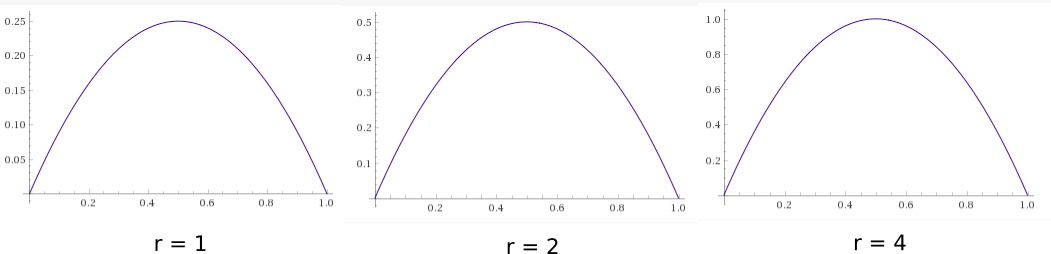

Vamos simular várias iterações do método em Python para analisar o comportamento do tamanho da população em função do tempo t. O script em Python a seguir mostra uma implementação computacional do modelo utilizando 100 iterações.

Entre com a constante r: 3
Entre com x0: 0.4
População no longo prazo:  0.6877497559140545


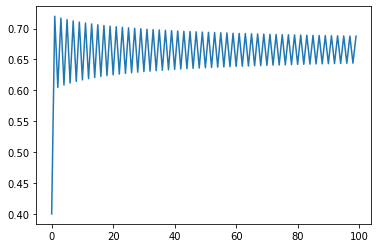

In [ ]:
import matplotlib.pyplot as plt

# Número de iterações para atingir equilíbrio
MAX = 100

r = float(input('Entre com a constante r: '))
x = float(input('Entre com x0: '))

population = [x]

for i in range(1, MAX):
	x = r*x*(1 - x)
	population.append(x)


print('População no longo prazo: ', population[-1])

# Plota gráfico da população pelo tempo
eixox = list(range(MAX))
plt.figure(1)
plt.plot(eixox, population)
plt.show()

Execute o script e veja o que acontece para as entradas a seguir:

a) r = 1 e x0 = 0.4	(extinção)

b) r = 2 e x0 = 0.4	(equilíbrio em 50%)

c) r = 2.4 e x0 = 0.6	(pequena oscilação, mas atinge equilíbrio em 58%)	

d) r = 3 e x0 = 0.4	(não há equilíbrio, população oscila, mas em torno de uma média)

e) r = 4 e x0 = 0.4	(comportamento caótico, totalmente imprevisível)

Em seguida, iremos estudar o que acontece com a população de equilíbrio conforme variamos o valor do parâmetro r. A ideia é que no eixo x iremos plotar os possíveis valores de r e no eixo y iremos plotar a população de equilíbrio para aquele valor de r específico. Iremos considerar que a população do equilíbrio é obtida depois de 1000 iterações. O script em Python a seguir mostra a  implementação computacional dessa análise.

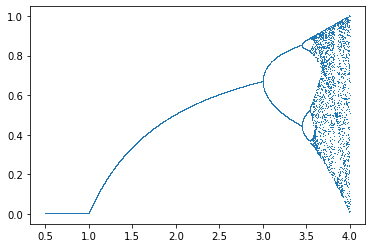

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Cria um vetor com todos os possíveis valores de r
R = np.linspace(0.5, 4, 20000)

m = 0.5

# Inicializa os eixos x e y vazios
X = []
Y = []
# Loop principal (iterar para todo r em R)
for r in R:
    # Adiciona r no eixo x
    X.append(r)

    # Escolhe um valor aleatório entre 0 e 1
    x = np.random.random()

    # Gera população de equilíbrio
    for l in range(1000):
      x=r*x*(1-x)
    
    Y.append(x)

# Plota o gráfico sem utilizar retas ligando os pontos
plt.plot(X, Y, ls='', marker=',')
plt.show()

O gráfico plotado pelo script acima é conhecido como bifurcation map. Esse fenômeno da bifurcação ocorre como uma manifestação do comportamento caótico da população de equilíbrio para valores de r maiores que 3. Na prática, o que temos é que para um valor de r = 3.49999, a população de equilíbrio é muito diferente daquela obtida para r = 3.50000 por exemplo. Pequenas perturbações no parâmetro r causam um efeito devastador na população de equilíbrio. Esse é o lema da teoria do caos, que pode ser parafraseado pela célebre sentença: o simples bater de asas de uma borboleta pode levar ao surgimento de um furação, conhecido também como o efeito borboleta.

Uma das propriedades do caos é que é possível encontrar ordem e padrões em comportamentos caóticos. Por exemplo, a seguir iremos desenvolver um script em Python para plotar uma sequencia de populações, começando de uma população inicial arbitrária e utilizando o valor de r = 3.99.

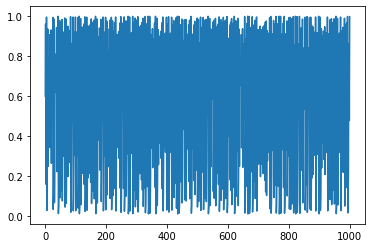

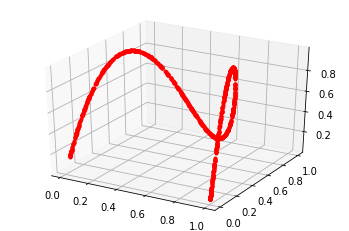

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def atrator(X):
    A = X[:len(X)-2]
    B = X[1:len(X)-1]
    C = X[2:]
    #Plota atrator em 3D
    fig = plt.figure(2)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(A, B, C, '.', c='red')
    plt.show()
    
# Início do script
r = 3.99
x = np.random.random()
X = [x]

for i in range(1000):
    x = r*x*(1 - x)
    X.append(x)

# Plota o gráfico da sequência
plt.figure(1)
plt.plot(X)
plt.show()

atrator(X)

Note que o gráfico mostrado na figura anterior parece o de uma sequência totalmente aleatória.

A seguir, iremos plotar cada subsequência $(x_n, x_{n+1}, x_{n+2})$ como um ponto no $R^3$. Na prática, isso significa que no eixo X iremos plotar a sequência original, no eixo Y iremos plotar a sequência deslocada de uma unidade e no eixo Z iremos plotar a sequência deslocada de duas unidades. Qual será o gráfico formado? Se de fato a sequência for completamente aleatória, nenhum padrão deverá ser observado, apenas pontos dispersos aleatoriamente pelo espaço. Mas, surpreendentemente, temos a formação do seguinte padrão, conhecido como o atrator do modelo.

Podemos repetir a análise anterior, mas agora plotando o ponto  no plano. Conforme discutido anteriormente, vimos que  é uma função quadrática, ou melhor, uma parábola. O experimento prático apenas comprova a teoria. Note que o gráfico obtido pelo script a seguir é exatamente a parábola. Conforme a teoria, note que o ponto de máximo ocorre em $x_n = 0.5$, e o valor da função nesse ponto, f(xn), é praticamente 1 (r/4 = 3.99/4).

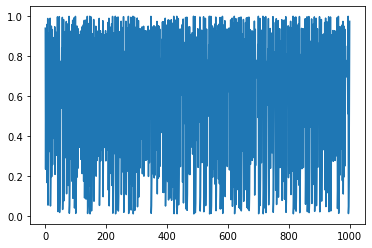

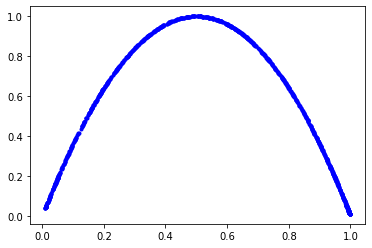

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

r = 3.99
x = np.random.random()	# a população é x minúsculo!
X = [x]			     	# a lista é X maiúsculo!

for i in range(1000):
	x = r*x*(1 - x)
	X.append(x)

# Plota o gráfico da sequência
plt.figure(1)
plt.plot(X)
plt.show()

A = X[:len(X)-1]
B = X[1:len(X)]

#Plota atrator em 3D
plt.figure(2)
plt.plot(A, B, '.', c='blue')
plt.show()

Interessante, não é mesmo? Dentro do caos, há ordem. Muitos fenômenos que observamos no mundo real parecem ser aleatórios, mas na verdade exibem comportamento caótico. A pergunta que fica é justamente essa: como distinguir um sistema aleatório de um sistema caótico? Como identificar os padrões que nos permitem enxergar a ordem em um sistema caótico? Para responder a esse questionamento precisamos mergulhar fundo na matemática dos sistemas complexos e da teoria do caos.

Link para o ambiente Google Colab: https://colab.research.google.com/drive/12Qdn8WViJqDZgwNrE_pv5Mlx7YkmHlQV?usp=sharing

"O maior inimigo do conhecimento não é a ignorância, mas a ilusão de ter conhecimento."
-- Stephen Hawking